In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

In [49]:
df=pd.read_csv('sshape.csv')
df.head()

,year,price
0,2000,1000
1,2001,1100
2,2002,1105
3,2003,1101
4,2004,1102


In [75]:
X=df[['year']].values
y=df['price'].values

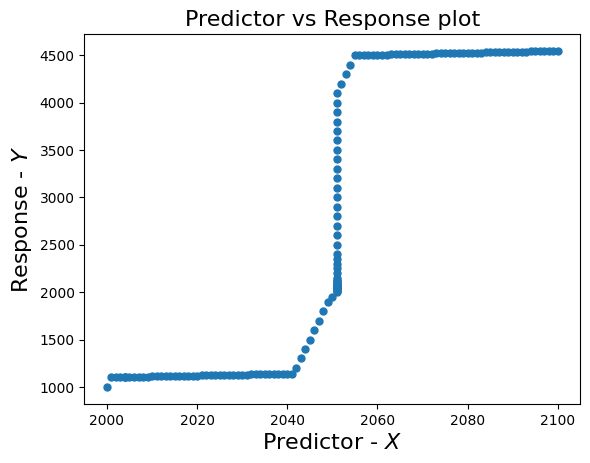

In [76]:
fig, ax = plt.subplots()
ax.plot(X,y, '.', label = 'Observed values',markersize=10)
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [77]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=109)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

alphas = [0.1, 1, 10, 100, 1000, 10000]
max_iter = 20000  
tol = 1e-5

training_error, validation_error = [],[]
poly=PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(X_train_scaled)
x_poly_val=poly.fit_transform(X_val_scaled)


In [78]:
for alpha in alphas:

    ridge_reg = Ridge(fit_intercept=False, alpha=alpha,solver='lsqr',max_iter=max_iter,tol=tol)
    ridge_reg.fit(x_poly_train,y_train)

    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)

    MSE_train=mean_squared_error(y_train,y_train_pred)
    MSE_val=mean_squared_error(y_val,y_val_pred)

    training_error.append(MSE_train)
    validation_error.append(MSE_val)

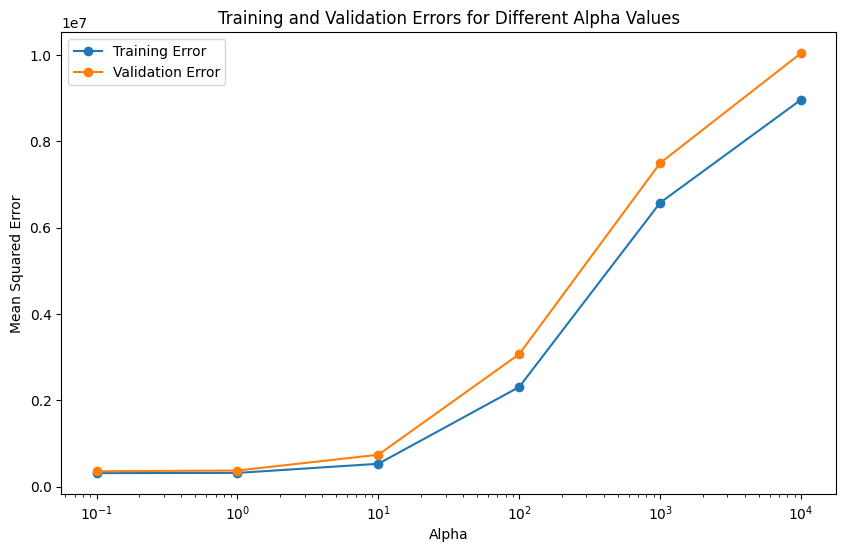

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, training_error, label='Training Error', marker='o')
plt.plot(alphas, validation_error, label='Validation Error', marker='o')
ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('Training and Validation Errors for Different Alpha Values')
plt.legend()
plt.show()

In [85]:
best_parameter = alphas[np.argmin(validation_error)]
print(f'The best hyper parameter value, alpha = {best_parameter}')


tuned_ridge = Ridge(alpha=best_parameter, solver='lsqr', max_iter=20000, tol=1e-5)
tuned_ridge.fit(x_poly_train, y_train)

The best hyper parameter value, alpha = 0.1


Ridge(alpha=0.1, max_iter=20000, solver='lsqr', tol=1e-05)

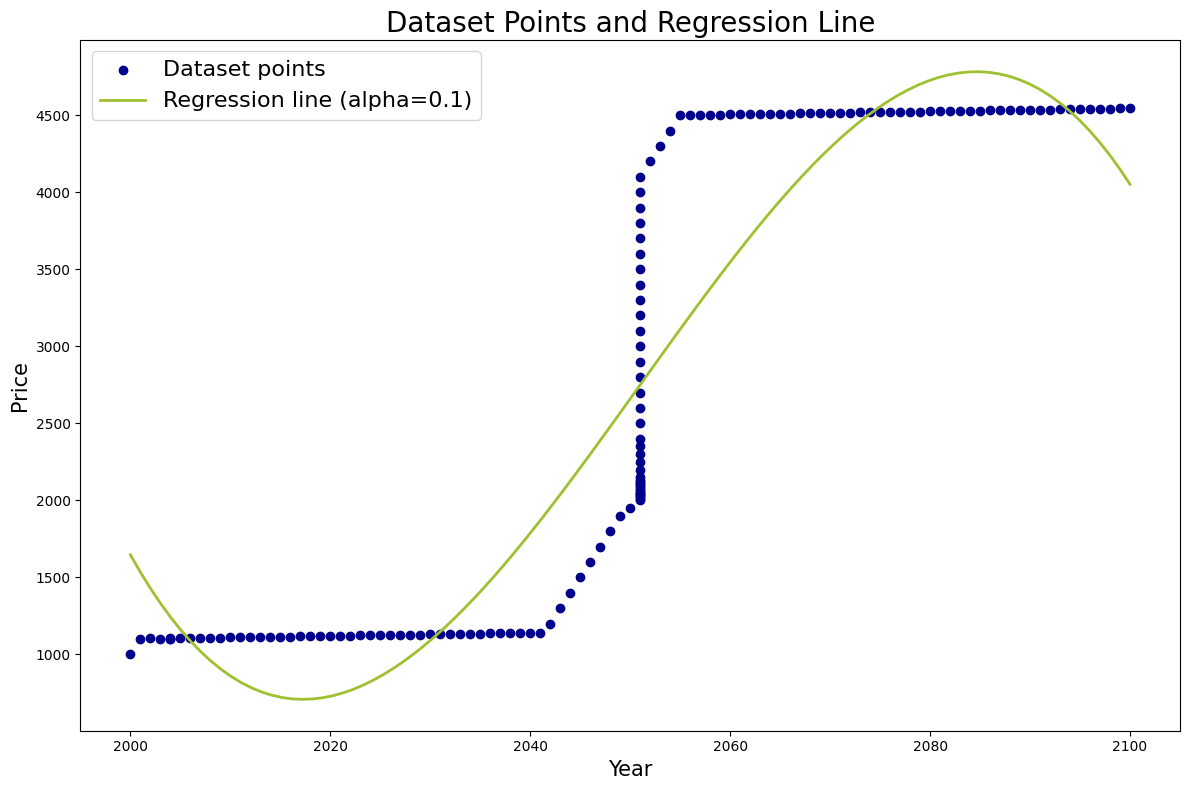

In [91]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = tuned_ridge.predict(X_range_poly)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y, label='Dataset points', color='Darkblue')
ax.plot(X_range, y_range_pred, label=f'Regression line (alpha={best_parameter})', color='#9FC131FF', linewidth=2)

ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.legend(loc='upper left', fontsize=16)
ax.set_title('Dataset Points and Regression Line', fontsize=20)
plt.tight_layout()
plt.show()